In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [5]:
data_path = "/Users/bradpayne/Desktop/CS6890/project/data/training.1600000.processed.noemoticon.csv"

In [6]:
data = pd.read_csv(data_path, header=None )
data.columns = ["target", "id", "date", "flag", "user", "text"]

In [7]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Exploration

In [8]:
len(data)

1600000

In [9]:
# negative 
data["target"][data["target"] == 0].count()

800000

In [10]:
# neutral
data["target"][data["target"] == 2].count()

0

In [11]:
# positive 
data["target"][data["target"] == 4].count()

800000

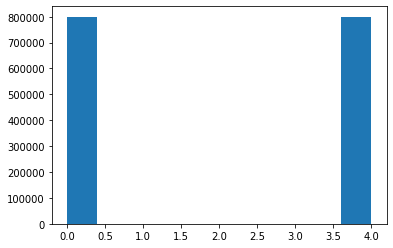

In [12]:
# target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
plt.figure()
plt.hist(data["target"])
plt.show()

In [13]:
# check to see if there is anything useful in the 'flag' column
np.where(data["flag"] != "NO_QUERY")

(array([], dtype=int64),)

```
All of the flag columns are set to NO_QUERY, so the column is not useful
```

In [14]:
data.id.nunique()

1598315

In [15]:
data.text.nunique()

1581466

In [16]:
duplicate_text = np.where(data.text.duplicated())

In [17]:
data.loc[duplicate_text].head()

,target,id,date,flag,user,text
1940,0,1468267465,Tue Apr 07 00:38:38 PDT 2009,NO_QUERY,ei8htyOne,and so the editing of 3000 wedding shots begins
2149,0,1468316454,Tue Apr 07 00:56:00 PDT 2009,NO_QUERY,Augustina22CA,"im lonely keep me company! 22 female, california"
3743,0,1468664220,Tue Apr 07 03:02:08 PDT 2009,NO_QUERY,FranciscoAndre,I'm not liking that new iTunes Pricing at all....
3746,0,1468664704,Tue Apr 07 03:02:17 PDT 2009,NO_QUERY,ammaryasir,"cant eat, drink or breath properly thanks to t..."
4163,0,1468756463,Tue Apr 07 03:33:56 PDT 2009,NO_QUERY,lkm1989,has a cold


In [18]:
# unique users 
data.user.nunique()

659775

In [ ]:
plt.figure()
plt.hist(data["user"])
plt.show()

In [20]:
from datetime import datetime

In [21]:
data["date"][0]

'Mon Apr 06 22:19:45 PDT 2009'

In [22]:
datetime.strptime("PDT", "%Z")

ValueError: time data 'PDT' does not match format '%Z'

In [23]:
datetime.strptime(data["date"][0], "%a %b %d %H:%M:%S PDT %Y")

datetime.datetime(2009, 4, 6, 22, 19, 45)

In [24]:
data["formated_date"] = data["date"].apply(lambda x: datetime.strptime(x, "%a %b %d %H:%M:%S PDT %Y"))

In [25]:
data["formated_date"].describe()

/var/folders/37/7mzk5kw57r7g8szv12sz9g7r0000gn/T/ipykernel_4747/1792313948.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data["formated_date"].describe()


count                 1600000
unique                 774363
top       2009-06-15 12:53:14
freq                       20
first     2009-04-06 22:19:45
last      2009-06-25 10:28:31
Name: formated_date, dtype: object

In [26]:
data["date"].min()

'Fri Apr 17 20:30:31 PDT 2009'

In [27]:
data["date"].max()

'Wed May 27 07:27:38 PDT 2009'

In [28]:
data["date"].describe()

count                          1600000
unique                          774363
top       Mon Jun 15 12:53:14 PDT 2009
freq                                20
Name: date, dtype: object

## Text Cleaning

In [29]:
data.text[501]

'@cleders sorry...i was rooting for them too... '

In [1]:
import re

In [31]:
# remove punctuation, replace elipses with spaces 
test_text = re.sub(r'\.{3,}', " ", data.text[501])
re.sub(r'[^A-Za-z0-9 ]+', "", test_text)

'cleders sorry i was rooting for them too  '

In [44]:
!pip install tweet-preprocessor

In [45]:
import nltk
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.NUMBER)

AttributeError: module 'preprocessor' has no attribute 'set_options'

In [46]:
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bradpayne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
stopwords = [re.sub(r'[^a-z]+', "", word) for word in stopwords]
stopwords.append("")

```
By default, p clean removes the following,
Can be customized 
https://pypi.org/project/tweet-preprocessor/
Option Name	Option Short Code
URL	p.OPT.URL
Mention	p.OPT.MENTION
Hashtag	p.OPT.HASHTAG
Reserved Words	p.OPT.RESERVED
Emoji	p.OPT.EMOJI
Smiley	p.OPT.SMILEY
Number	p.OPT.NUMBER
```

In [47]:
# remove urls, 
test_text = p.clean(test_text).lower()

AttributeError: module 'preprocessor' has no attribute 'clean'

In [48]:
test_text

'@cleders sorry i was rooting for them too  '

In [49]:
[word for word in test_text.split(" ") if word not in stopwords]

['@cleders', 'sorry', 'rooting', '', '']

In [50]:
data.target[501]

0

In [51]:
data["clean_text"] = data.text.apply(lambda text: p.clean(text).lower())

AttributeError: module 'preprocessor' has no attribute 'clean'

In [52]:
data["text"][99972]

'isPlayer Has Died! Sorry '

In [53]:
data["text"].describe()

count                       1600000
unique                      1581466
top       isPlayer Has Died! Sorry 
freq                            210
Name: text, dtype: object

In [59]:

def clean_text(text, stopwords=stopwords):
    """ cleans text of urls, emojis, 

    Args:
        text (str): tweet text
        stopwords (list, optional): list of stopwords. Defaults to nltk.english.stopwords.

    Returns:
        list: list of words in tweet after preprocessing
    """
    # text = p.clean(text).lower()
    text = text.lower()
    text = re.sub(r'\.{3,}', " ", text)
    text = re.sub(r'&[A-Za-z]*;', "", text)
    text = re.sub(r'[^A-Za-z0-9 ]+', "",text)
    return " ".join([word for word in text.split(" ") if word not in stopwords])

In [60]:
re.sub(r'&[A-Za-z]*;', "", data["text"][3456])

"The Muppet Whatnot Workshop site is temporarily down, apparently totally sold out Working hard to get it back ASAP  Hurry up, y'all. "

In [61]:
clean_text(data["text"][3456])

'muppet whatnot workshop site temporarily apparently totally sold working hard get back asap  hurry yall '

In [62]:
data["clean_text"] = data.text.apply(lambda text: clean_text(text))

In [ ]:
data.head(10)

,target,id,date,flag,user,text,formated_date,clean_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,awww thats bummer shoulda got david carr third...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,dived many times ball managed save rest go bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,behaving im mad cant see
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,2009-04-06 22:20:00,whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,2009-04-06 22:20:03,need hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,2009-04-06 22:20:03,hey long time see yes rains bit bit lol im fin...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,2009-04-06 22:20:05,nope
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,2009-04-06 22:20:09,que muera


## Vectorization

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
def getBOWRepresentation(tweets):    
    vectorizer = CountVectorizer(stop_words=None)
    vectorizer.fit(tweets)
    bow_representation = vectorizer.transform(tweets)
    return bow_representation, vectorizer

In [104]:
BOW, vectorizer = getBOWRepresentation(data["clean_text"].to_numpy())

In [66]:
vectorizer.vocabulary_

{'switchfoot': 660316,
 'httptwitpiccom2y1zl': 313191,
 'awww': 59747,
 'thats': 673019,
 'bummer': 99562,
 'shoulda': 619703,
 'got': 243603,
 'david': 155754,
 'carr': 109183,
 'third': 680403,
 'day': 156852,
 'upset': 711777,
 'cant': 106457,
 'update': 711265,
 'facebook': 206324,
 'texting': 671422,
 'might': 469134,
 'cry': 144799,
 'result': 579539,
 'school': 604159,
 'today': 688069,
 'also': 34647,
 'blah': 81829,
 'kenichan': 397115,
 'dived': 170945,
 'many': 449375,
 'times': 684695,
 'ball': 64353,
 'managed': 447799,
 'save': 602012,
 '50': 11184,
 'rest': 579325,
 'go': 240295,
 'bounds': 89528,
 'whole': 733607,
 'body': 86035,
 'feels': 211366,
 'itchy': 355429,
 'like': 425301,
 'fire': 215031,
 'nationwideclass': 499927,
 'behaving': 72048,
 'im': 346122,
 'mad': 443456,
 'see': 607977,
 'kwesidei': 410577,
 'crew': 143215,
 'need': 501610,
 'hug': 337378,
 'loltrish': 433253,
 'hey': 263793,
 'long': 433663,
 'time': 684423,
 'yes': 753731,
 'rains': 568287,
 'bit

In [67]:
len(vectorizer.vocabulary_)

762202

## Split into Train, Test, and Validation

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(BOW, data["target"].to_numpy())

## ML Algorithm

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
clf = RandomForestClassifier()

In [89]:
clf.fit(X_train[0:100000], y_train[0:100000])


RandomForestClassifier()

In [83]:
np.where(data["target"].to_numpy()[0:10000])

(array([], dtype=int64),)

In [77]:
clf.predict(BOW[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Evalute Model

In [73]:
from sklearn.metrics import accuracy_score

In [93]:
y_test.shape

(400000,)

In [94]:
y_pred = clf.predict(X_test)

In [108]:
y_pred[0:25]

array([4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4,
       0, 0, 0])

In [95]:
# Accuracy of the test set 
accuracy_score(y_test, y_pred)

0.7508275

In [113]:
rep = vectorizer.transform(("love flying",))

In [114]:
rep

<1x762202 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [115]:
clf.predict(rep)

array([4])

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

In [80]:
y

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1])